<a href="https://colab.research.google.com/github/parisasl/BinaryClassifier/blob/main/BinaryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Environment Setup & Dataset Loading:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

##  Preparing & Preprocessing the Data:

In [ ]:
def load_dataset():
    train_dataset = h5py.File('../paris/OneDrive/Desktop/Prog_docum/dataset/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # trainset features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # trainset labels

    test_dataset = h5py.File('../paris/OneDrive/Desktop/Prog_docum/dataset/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # testset features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # testset labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # shape of array
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0])) # shape of array (1 * n)

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [0], it's a 'non-cat' picture.


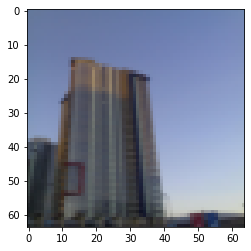

In [ ]:
# Example of a picture
index = 90
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [ ]:
# data shape in test and train sets 
m_train = train_set_y.shape[1] # as we set the train_set_y in the first block to (1*n) which mean we have n label 
m_test = test_set_y.shape[1] 
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T  # 2 array (shpae of each image, m)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T  # 2 array (shpae of each image, m)

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [ ]:
#standardize the dataset
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

### Building & Training Model:

In [ ]:
# sigmoid function

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    
    return s

In [ ]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [ ]:
# Implement the cost function and its gradient for forward propagation

def propagate(w, b, X, Y):

    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST) 
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    
    ### Adding a small value to log function to compensate
    # cost = (- 1 / 1) * np.sum(Y * np.log(A+10**(-100)) + (1 - Y) * (np.log(1 - A+10**(-100))))  # compute cost
    
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost 
    
    ### removing (1/m)
    # cost = (- 1 / 1) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    
    ### printing each part of the cost variable
    # temp1 = (-1) * Y * np.log(A)
    # temp2 = (-1) * (1 - Y) * (np.log(1 - A))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw =  (1/m) * (np.dot(X, (A - Y).T))# after doing derivation this final equation is dJ/dW
    db =  (1/m) * (np.sum(A - Y))
    
    ### removing the (1/m) 
    #dw =  (np.dot(X, (A - Y).T))# after doing derivation this final equation is dJ/dW
    #db =  (np.sum(A - Y))
    
    grads = {"dw": dw,
             "db": db}
    # return grads, cost, temp1, temp2
    return grads, cost 

In [ ]:
#update the parameters
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    """
    
    costs = []
    
    for i in range(num_iterations):
    
        
        # Cost and gradient calculation
        # grads, cost,temp1, temp2 = propagate(w, b, X, Y)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost of training examples
        if print_cost:
            print ("Cost after iteration %i: %f" % (i, cost))
        # print("part1" + str(temp1))
        # print("part2" + str(temp2))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
# predict the image is cat or non-cat
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

In [ ]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[0. 0.]]


In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.01, print_cost=False):
    """
    Builds the logistic regression model by calling the function implemented previously
    """
    
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b
    w = parameters["w"]
    b = parameters["b"]
    
    #print("w:"+ str(w))
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Evaluating Model:

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1: 1.120174
Cost after iteration 2: 2.112718
Cost after iteration 3: 3.199729
Cost after iteration 4: 0.810026
Cost after iteration 5: 1.887411
Cost after iteration 6: 3.188168
Cost after iteration 7: 0.794978
Cost after iteration 8: 1.870697
Cost after iteration 9: 3.151356
Cost after iteration 10: 0.764848
Cost after iteration 11: 1.802202
Cost after iteration 12: 3.113051
Cost after iteration 13: 0.735612
Cost after iteration 14: 1.721601
Cost after iteration 15: 3.069842
Cost after iteration 16: 0.705166
Cost after iteration 17: 1.622766
Cost after iteration 18: 3.018224
Cost after iteration 19: 0.671908
Cost after iteration 20: 1.496343
Cost after iteration 21: 2.949022
Cost after iteration 22: 0.632334
Cost after iteration 23: 1.313921
Cost after iteration 24: 2.828350
Cost after iteration 25: 0.577556
Cost after iteration 26: 0.966709
Cost after iteration 27: 2.416880
Cost after iteration 28: 0.559422
Cost after iteration 29:

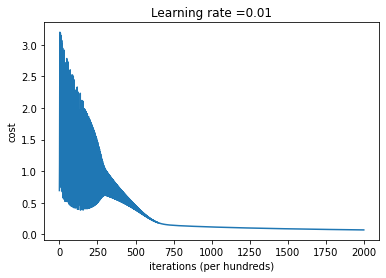

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 91.38755980861244 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 4e-05
train accuracy: 65.55023923444976 %
test accuracy: 36.0 %

-------------------------------------------------------



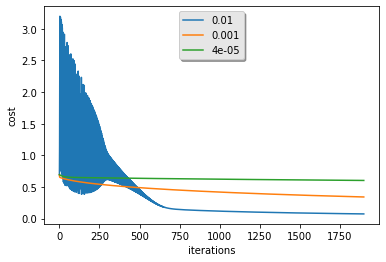

In [ ]:
learning_rates = [0.01, 0.001, 0.00004] #1/209*0.01 == 0.00004 (in case of removing 1/m)
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1900, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()